# Making Plots with `plotnine`
## Questions
- How can I visualize data in Python?
- What is ‘grammar of graphics’?

![Scatter plots of weight vs hindfoot length, colored by species and facetted by plot ID](fig/06_facet_all_plot.png)

## Setup

In [1]:
%matplotlib inline
import plotnine as p9

In [2]:
import pandas as pd

In [3]:
surveys_complete = pd.read_csv('data/surveys.csv')

In [4]:
surveys_complete = surveys_complete.dropna()

In [ ]:
type(surveys_complete)

In [ ]:
1 + 2

In [ ]:
'abc' + 'def'

## Plotting with `plotnine`

In [ ]:
p9.ggplot(data=surveys_complete)

In [ ]:
(p9.ggplot(data=surveys_complete, mapping=p9.aes(x='weight', y='hindfoot_length')))

In [ ]:
(p9.ggplot(data=surveys_complete, mapping=p9.aes(x='weight', y='hindfoot_length')) + p9.geom_point())

In [ ]:
surveys_plot = p9.ggplot(data=surveys_complete, mapping=p9.aes(x='weight', y='hindfoot_length'))

In [ ]:
surveys_plot

In [ ]:
surveys_plot + p9.geom_point(alpha=0.1)

---
### 📊 Challenge - bar chart (5 min)
Working on the `surveys_complete` data set, use the `plot_id` column to create a bar plot that counts the number of records for each plot. 

_Check the documentation of the bar geometry to handle the counts_ - in Jupyter you can type `p9.geom_bar?` or `help(p9.geom_bar)` 

---

In [ ]:
(p9.ggplot(data=surveys_complete, mapping=p9.aes(x='plot_id')))

In [ ]:
(p9.ggplot(data=surveys_complete, mapping=p9.aes(x='plot_id')) + p9.geom_bar())

## Building plots iteratively

In [ ]:
(p9.ggplot(data=surveys_complete, mapping=p9.aes(x='weight', y='hindfoot_length'))
  + p9.geom_point(alpha=0.1, color='red'))

In [ ]:
(p9.ggplot(data=surveys_complete, mapping=p9.aes(x='weight', y='hindfoot_length', color='species_id'))
  + p9.geom_point(alpha=0.1)
)

In [ ]:
(p9.ggplot(data=surveys_complete, mapping=p9.aes(x='weight', y='hindfoot_length', color='species_id'))
  + p9.geom_point(alpha=0.1)
  + p9.xlab("Weight (g)")
)

In [ ]:
(p9.ggplot(data=surveys_complete, mapping=p9.aes(x='weight', y='hindfoot_length', color='species_id'))
  + p9.geom_point(alpha=0.1)
  + p9.xlab("Weight (g)")
  + p9.scale_x_log10()
)

In [ ]:
(p9.ggplot(data=surveys_complete, mapping=p9.aes(x='weight', y='hindfoot_length', color='species_id'))
  + p9.geom_point(alpha=0.1)
  + p9.xlab("Weight (g)")
  + p9.scale_x_log10()
  + p9.theme_bw()
  + p9.theme(text=p9.element_text(size=16))
)

---
### 📊 Challenge - bar plot adaptations (5 min)
Adapt the bar plot of the previous exercise by mapping the sex variable to the color fill of the bar chart. Change the scale of the color fill by providing the colors _blue_ and _orange_ manually. 

(See API reference to find the appropriate function: https://plotnine.readthedocs.io/en/stable/api.html#color-and-fill-scales).

---

In [ ]:
(p9.ggplot(data=surveys_complete,
          mapping=p9.aes(x='plot_id', fill='sex'))
 + p9.geom_bar()
 + p9.scale_fill_manual(["blue", "orange"])
 + p9.labels.labs(fill='Sex')
)

## Plotting distributions

In [ ]:
(p9.ggplot(data=surveys_complete,
          mapping=p9.aes(x='species_id', y='weight'))
 + p9.geom_boxplot()
)

In [ ]:
(p9.ggplot(data=surveys_complete,
          mapping=p9.aes(x='species_id', y='weight'))
 + p9.geom_boxplot()
 + p9.geom_jitter(alpha=0.2)
)

---
### 📊 Challenge - distributions (10 min)
Boxplots are useful summaries, but hide the shape of the distribution. For example, if there is a bimodal distribution, this would not be observed with a boxplot. An alternative to the boxplot is the _violin plot_ (sometimes known as a _beanplot_), where the shape of the density of points is drawn.
In many types of data, it is important to consider the scale of the observations.  For example, it may be worth changing the scale of the axis to better distribute the observations in the space of the plot.

- Replace the box plot with a violin plot, `geom_violin()`
- Represent weight on the log10 scale, `scale_y_log10()`
- Add color to the datapoints on your boxplot according to the plot from which the sample was taken (`plot_id`)

_Hint: Check the class for `plot_id`. By using `factor()` within the `aes` mapping of a variable, plotnine will handle the values as category values._

---

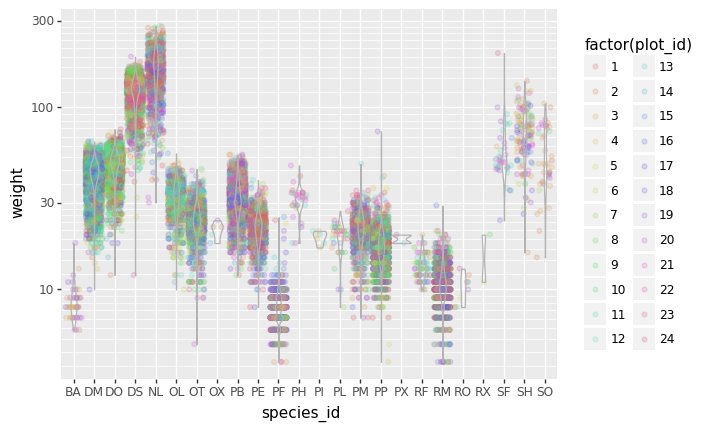

<ggplot: (336718287)>

In [6]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='species_id', y='weight', color='factor(plot_id)'))
  + p9.geom_jitter(alpha=0.2)
  + p9.geom_violin(alpha=0, color="0.7")
  + p9.scale_y_log10()
)

## Plotting time series data

## Facetting

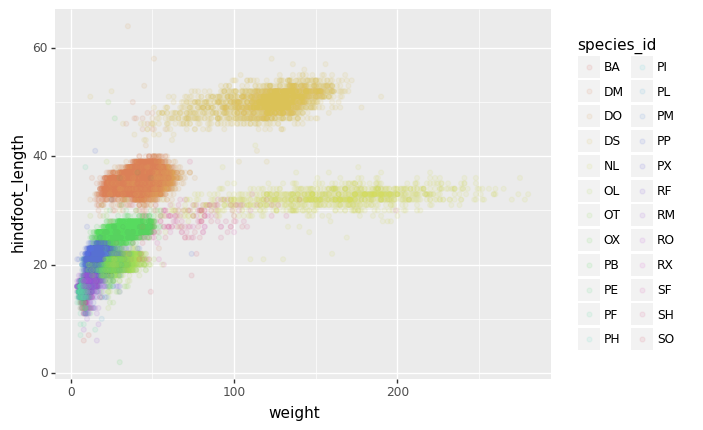

<ggplot: (336815495)>

In [7]:
(p9.ggplot(data=surveys_complete, mapping=p9.aes(x='weight', y='hindfoot_length', color='species_id'))
  + p9.geom_point(alpha=0.1)
)

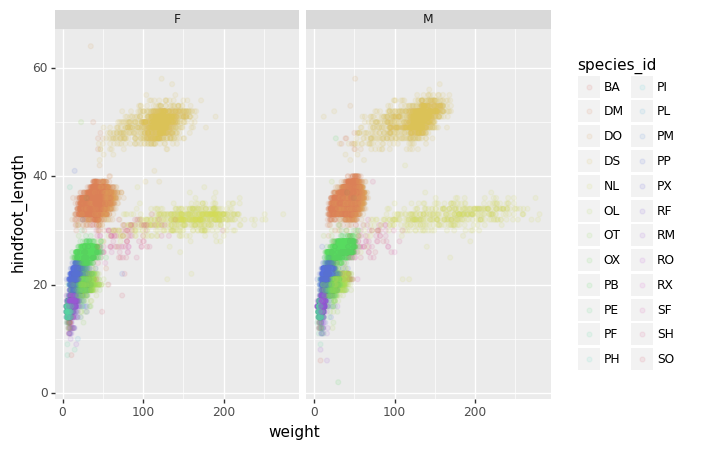

<ggplot: (335930711)>

In [8]:
(p9.ggplot(data=surveys_complete, mapping=p9.aes(x='weight', y='hindfoot_length', color='species_id'))
  + p9.geom_point(alpha=0.1)
  + p9.facet_wrap("sex")
)

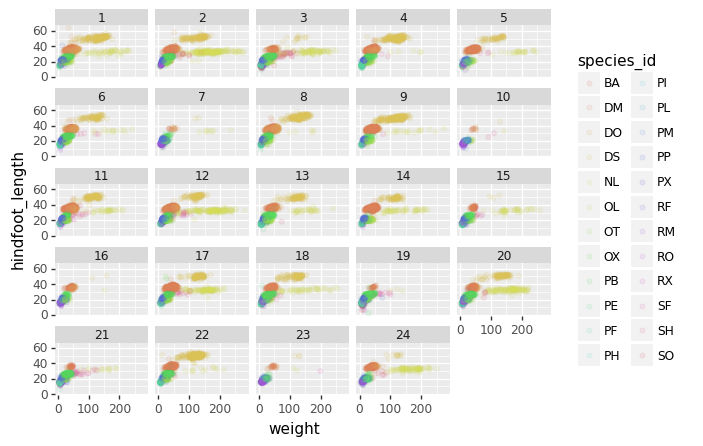

<ggplot: (335987740)>

In [9]:
(p9.ggplot(data=surveys_complete, mapping=p9.aes(x='weight', y='hindfoot_length', color='species_id'))
  + p9.geom_point(alpha=0.1)
  + p9.facet_wrap("plot_id")
)

---
### 📊 Challenge - facetting (10 min)
1. Create a separate plot for each of the species that depicts how the average weight of the species changes through the years.
2. Based on your solution to part 1, visually compare how the weights of male and females has changed through time by creating a separate plot for each sex and an individual colour assigned to each `species_id`.

---

## Further customisation

## Saving plots

In [10]:
my_plot = (p9.ggplot(data=surveys_complete, mapping=p9.aes(x='weight', y='hindfoot_length', color='species_id'))
  + p9.geom_point(alpha=0.1)
  + p9.facet_wrap("plot_id")
)

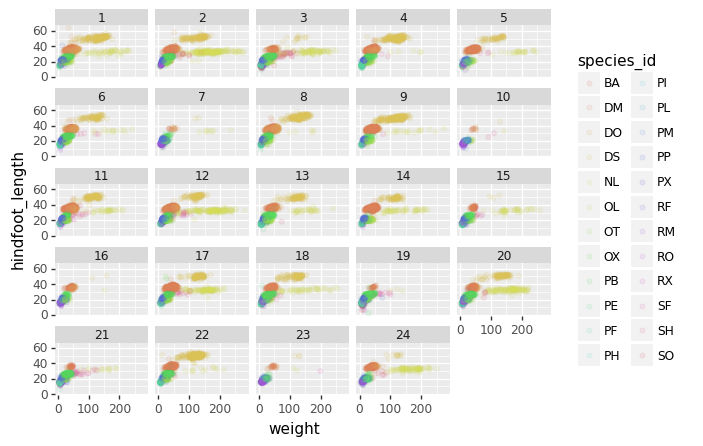

<ggplot: (336773511)>

In [11]:
my_plot

In [12]:
my_plot.save("scatterplot_facetted.png", width=10, height=10, dpi=300)

/Users/hodges/opt/anaconda3/envs/python-ecology-lesson/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 10 x 10 in image.
/Users/hodges/opt/anaconda3/envs/python-ecology-lesson/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: scatterplot_facetted.png


## Key points

- The `data`, `aes` variables and a `geom`etry are the main elements of a plotnine graph
- With the `+` operator, additional `scale_*`, `theme_*`, `xlab`/`ylab` and `facet_*` elements are added
